In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris=load_iris()
X=iris.data
y=iris.target

X_train,X_val,y_train,y_val=train_test_split(X,y)

In [5]:
X_centered=X-X.mean(axis=0)
U,s,Vt=np.linalg.svd(X_centered)#奇異值分解(Singular Value Decomposition,SVD)
c1=Vt.T[:,0]
c2=Vt.T[:,1]
print(f'c1={c1}*****c2={c2}')

c1=[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]*****c2=[-0.65658877 -0.73016143  0.17337266  0.07548102]


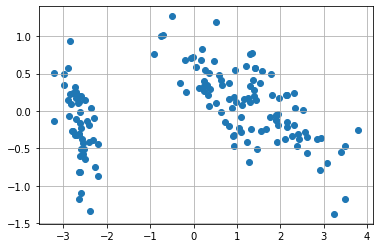

In [6]:
import matplotlib.pyplot as plt
#將分解後的前二主成份向量投射在平面上
W2=Vt.T[:,:2]
X2D=X_centered.dot(W2)

plt.scatter(X2D[:,0],X2D[:,1])
plt.grid(True)
plt.show()

In [7]:
from sklearn.decomposition import PCA
#使用Scikit-Learn再作一次
pca=PCA(n_components=2)#降成二維
X2D=pca.fit_transform(X)

c1=pca.components_.T[:,0]
c2=pca.components_.T[:,1]

print(f'c1={c1}*****c2={c2}')

c1=[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]*****c2=[ 0.65658877  0.73016143 -0.17337266 -0.07548102]


In [8]:
pca.explained_variance_ratio_#已解釋變異比

array([0.92461872, 0.05306648])

In [16]:
#算出保留訓練組至少95%變異度所需的維度
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)
# print(cumsum)

2


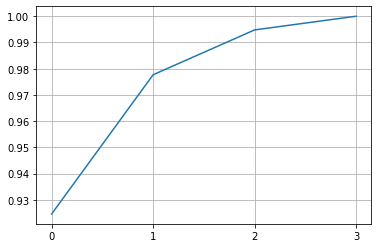

In [17]:
#已解釋變異度圖示
plt.xticks(ticks=[0,1, 2, 3])
plt.plot(cumsum)
plt.grid(True)
plt.show()

In [11]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X_train)#取得保留95%變異度的訓練資料


In [26]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X,y=mnist['data'],mnist['target']

In [29]:
#逆轉換
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
pca=PCA(n_components=154)
X_reduced=pca.fit_transform(X_train)
X_recovered=pca.inverse_transform(X_reduced)
X_recovered[:5]
# np.array(X_train)[:5]

array([[ 1.33078058e-13, -1.03835797e-13,  1.00950444e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.27579884e-14, -2.95869341e-14, -4.09282591e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.96031765e-14,  3.07035801e-14,  3.64102403e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.19293415e-14, -8.45613199e-14,  6.64121896e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.81239416e-14, -5.33623537e-14,  2.14592255e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

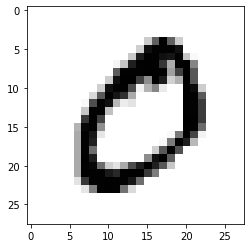

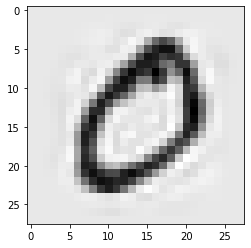

In [28]:
def images(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()


images(np.array(X_train)[1])
images(X_recovered[1])